##Presentazione del dataset

Lo scopo del presente progetto è definire modelli di machine learning che, **a partire da variabili socio-demografiche, permettano di prevedere a quale classe di reddito appartiene una persona.** <br>

Il dataset, oggetto della nostra analisi, prende il nome di "Adult census Income". E' stato estratto dal censimento statunitense del 1994 dal United States Census Bureau. <br>
E' costituito da 32561 istanze,ciascuna riferita ad una  persona, e da 15 features. Le features sono riporate di seguito.
1. **age**   -> età della persona
2. **workclass**  -> settore di impiego (categorico)
3. **fnlwgt**  -> peso demografico associat ad ogni individuo del campione (numerico)
4. **education**   -> livello di istruzione (categorico)  
5. **education.num**   -> numero di anni di studio (numerico)  
6. **marital.status**  -> stato legale dell'individuo (categorico)
7. **occupation**  -> lavoro effettivo che la persona svolge  (castegorico)
8. **relationship**   -> ruolo dell'individuo nel contesto familiare  (categorico)
9. **race**   -> razza   (categorico)
10. **sex**  -> genere  (categorico)
11. **capital.gain**  ->  capitale guadagnato dall'individuo  (numerico)
12. **capital.loss**  ->  capitale perso dall'individuo  (numerico)
13. **hours.per.week**   -> ore di lavoro settimanale  (numerico)
14. **native.country**  -> paese di origine  (categorico)
15. **income**   -> reddito  (categorico binario)

L'income rappresenta la nostra variabile target. Presenta die categorie: <=50K, >50K.  <br>
**L'obiettivo in termini predittivi è determinare se una persona ha un reddito annuo superiore o inferiore a 50K.**


La categoria “married-civ-spouse” si riferisce allo stato civile di una persona che è sposata e il coniuge è un civile, cioè non fa parte delle forze armate o non è un coniuge assente per motivi come il servizio militare. La categoria “married-AF-spouse” invece, fa riferimento a persone sposate con un coniuge che è nelle Forze Armate. La categoria “married-spouse-absent” si riferisce allo stato civile di una persona che è legalmente sposata, ma il coniuge è assente. <br>

“Prof-speciality” si riferisce a professioni che richiedono un alto livello di specializzazione e competenza, come medici, avvocati, ingegneri, scienziati e professori universitari. “craft-repair” si riferisce a mestieri e lavori di riparazione. Ad esempio, potrebbe includere elettricisti, idraulici, meccanici, falegnami e altri mestieri simili. “exec-managerial” si riferisce a ruoli di gestione esecutiva e manageriale, come direttori generali, direttori di dipartimento, manager di progetto e altri ruoli simili. “adm-clerical” si riferisce a una categoria di professioni che include ruoli amministrativi e di segreteria, come impiegati, assistenti amministrativi, segretari e altri ruoli simili. “sales” si riferisce a ruoli che riguardano la vendita di prodotti o servizi. Ad esempio, potrebbe includere venditori, rappresentanti di vendita, direttori delle vendite e altri ruoli simili.  “machine-op-inspct” si riferisce a una categoria di professioni che include operatori di macchine e ispettori. “protective-serv” si riferisce a ruoli nel settore dei servizi di protezione, come poliziotti, vigili del fuoco, guardie di sicurezza e altri ruoli simili.  “priv-house-serv” si riferisce a una categoria di professioni che include ruoli di servizio domestico privato, come governanti, cuochi privati, maggiordomi e altri ruoli simili.


Come prima operazione importiamo il dataset.


In [1088]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult (14).csv


In [1089]:
# Supponiamo che il file caricato si chiami 'nomeFile.csv' (controllare nella sezione File a sinistra)
data = pd.read_csv('adult.csv')

Al fine di valutare la qualità del dataset, si è fatto uso di due metodi molto generali: "describe()" e "info()". Il primo fornisce una sintesi statistica del dataset, il secondo invece fornisce informazioni sulla tipologia di dati che costituisce il datase, utile per individuare la presenza di valori mancanti.

In [1090]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1091]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1092]:
full_data = data.copy()

## Estrazione del test set
Per evitare il fenomeno del "data snooping bias" mettiamo da parte delle istanze nel test set per evitare di commettere errori durante l'intero processo. <br>
Se lo split è random, possiamo estrarre un test set che non è rappresentativo del dataset originario. Quindi si usa uno **stratified sampling**. Così facendo è possibile evitare anche **sampling bias** che si possono creare durante l'operazione di estrazione random. Il processo si articola nelle seguenti fasi:
1. Suddivisione del dataset in strati
2. Ogni strato deve avere un numero sufficiente di istanze per ogni cateogoria specifica (almeno per l'attributo target). <br>


Questa fase è molto delicata perchè introdurre bias adesso significa compromettere tutto il processo di learning.



In [1093]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(full_data, full_data['income']): # possiamo avere più split del dataset
    train_set = full_data.loc[train_index]
    test_set = full_data.loc[test_index]

In [1094]:
test_set["income"].value_counts() / len(test_set)

income
<=50K    0.759251
>50K     0.240749
Name: count, dtype: float64

In [1095]:
train_set["income"].value_counts() / len(train_set)

income
<=50K    0.759175
>50K     0.240825
Name: count, dtype: float64

Proprio come ci aspettavamo. <br>
Questa operazione potrebbe essere fatta considerando anche altre feature che sono molto significative nello spiegare la variabile target. Visualizziamo la matrice di correlazione di 'income'.

SALTATA IN QUESTA PRIMA FASE

In [1096]:
#corr_matrix['income'].sort_values(ascending=False)

Si sceglie la feature 'marital.status_Married-civ-spouse' per bipartire il dataset dal momento che oltre ad avere un'alta correlazione, ha anche una "feature importance" elevata.

In [1097]:
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(full_data, full_data['marital.status_Married-civ-spouse']): # possiamo avere più split del dataset
#    strat_train_set_2 = full_data.loc[train_index]
#    strat_test_set_2 = full_data.loc[test_index]

In [1098]:
#strat_test_set_2['marital.status_Married-civ-spouse'].value_counts() / len(strat_test_set_2)

In [1099]:
#strat_train_set_2["marital.status_Married-civ-spouse"].value_counts() / len(strat_train_set_2)

## Data Cleaning and Preparation

In questa sezione eseguiremo alcune operazioni preliminari ma molto significative, quali cleaning, trasformazioni e altro, se necessarie, in modo da rendere il dataset significativo per l'esecuzione dei modelli.



### Gestione preliminare dati mancanti

In [1100]:
nulls = train_set.isnull()
nulls.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048,26048


Sembra non esserci alcun dato mancante quindi possiamo saltare la parte di filtraggio delle corrispettive istanze.

### Rimozione di istanze duplicate

Ci sono svariati motivi per cui un dataset possa contenere duplicati, ad esempio se è ottenuto attraverso il merging di più dataset.   
A tal proposito si fa uso del metodo "duplicated()" di Pandas che restituisce true per un'istanza se è un duplicato di un'altra istanza, cioè se esiste un'altra istanza con diverso indice tale per cui ogni valore per colonna risulta essere uguale.

In [1101]:
duplicated = train_set.duplicated() # return a mask
duplicated.describe()

# Visualizzo eventualmente le istanze duplicate
#duplicate_rows = data[duplicated]
#print(duplicate_rows)

count     26048
unique        2
top       False
freq      26035
dtype: object

Notiamo che 26035/26048 istanze hanno valore False, ciò significa che 13 istanze sono duplicate. Procediamo con la rimozione di queste.

In [1102]:
from sklearn.base import BaseEstimator, TransformerMixin

class DuplicateRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
            return X.drop_duplicates()

removeDuplicate = DuplicateRemover()
train_set= removeDuplicate.fit_transform(train_set)

duplicated = train_set.duplicated()
duplicated.describe()

count     26035
unique        1
top       False
freq      26035
dtype: object

Notiamo che a questo punto ogni istanza ha valore a False.  
Si è deciso di creare un trasformer al fine di semplificare questa operazione sul test set.

### Analisi feature numeriche

Ci vogliamo assicurare che i valori delle feature categoriche siano effettivamente quelli presenti nelle varie istanze, evitando situazioni di inconsistenza dovute a lettere minuscole o maiuscole, spazi o altro.   
Ovviamente come riferimento si considerano le informazioni fornite da coloro che hanno caricato il dataset.  
Si visualizza in prima battuta tutte le distribuzioni delle feature categoriche.

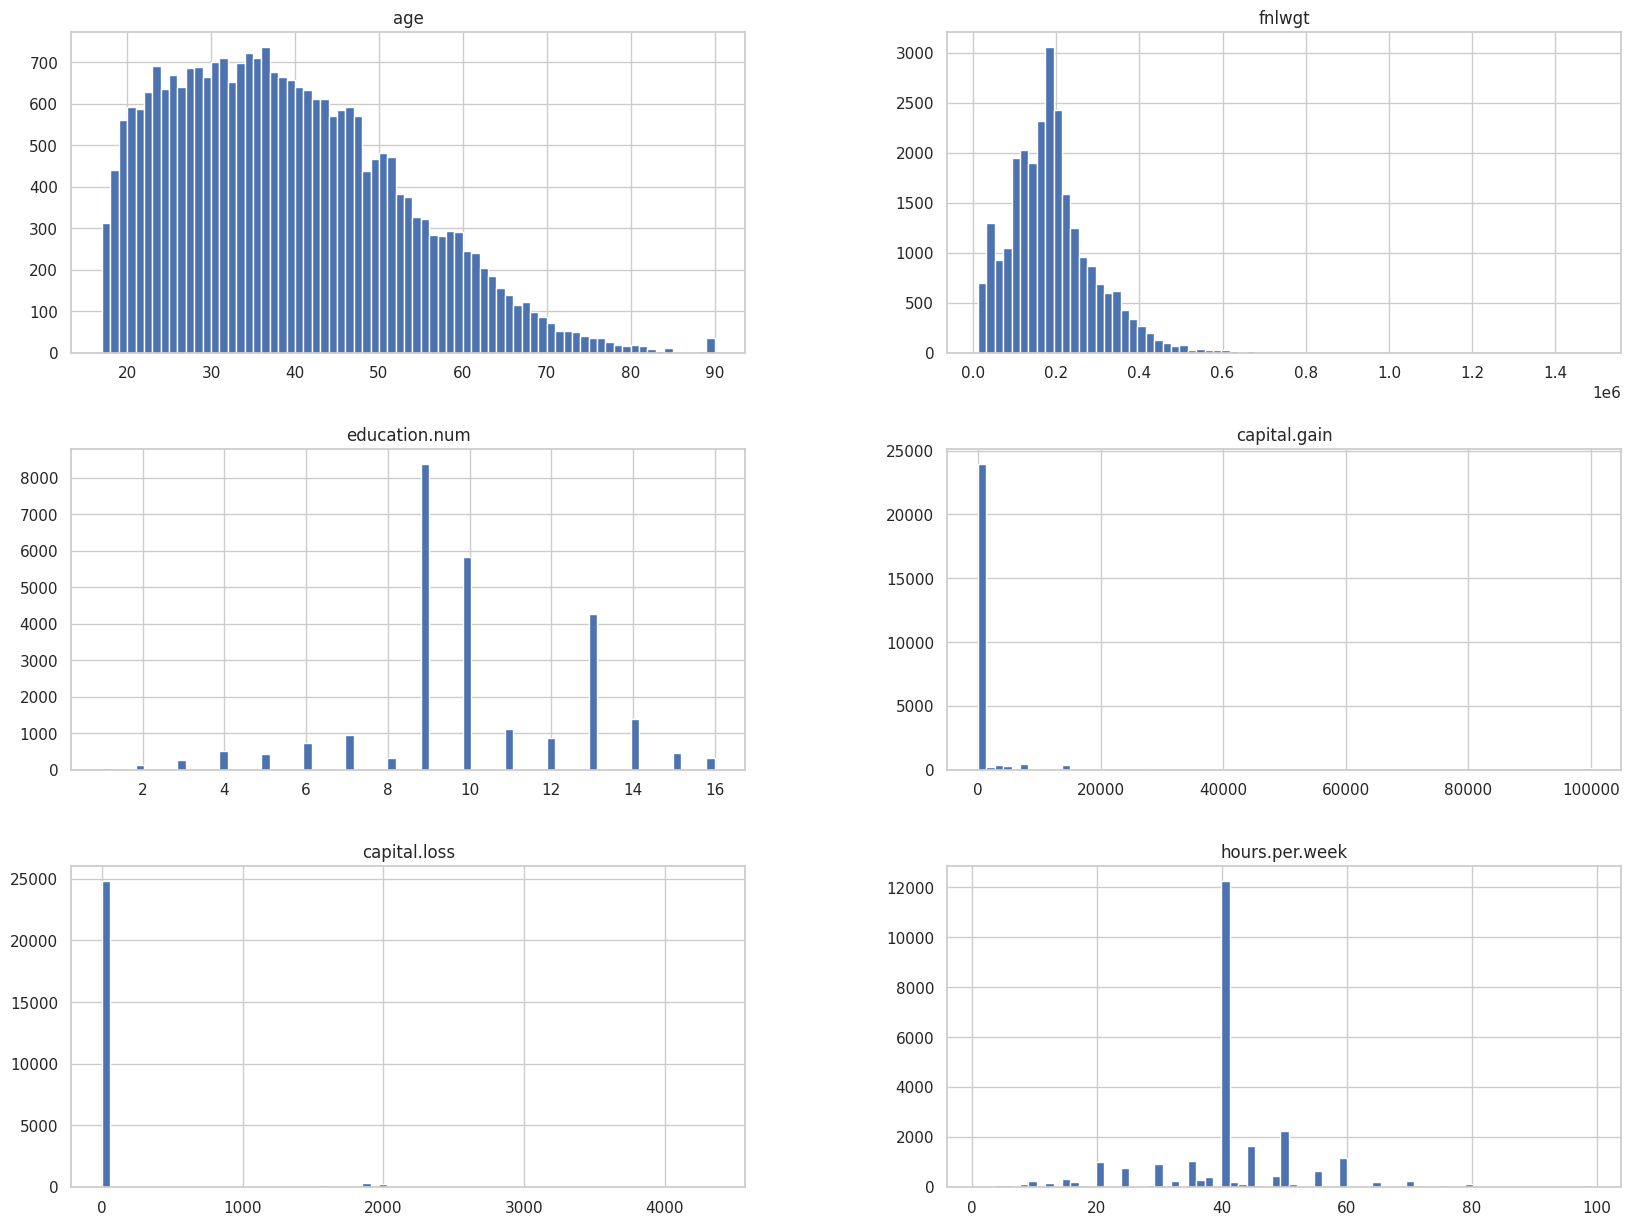

In [1103]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=73, figsize=(20,15))
plt.show()

La feature **capital.gain** rappresenta i profitti realizzati dalla vendita di beni o investimenti e in questo contesto indica precisamente la somma totale dei profitti ottenuti da tali vendite durante un periodo di tempo specifico (di solito un anno). Al contrario la feature **capital.loss** rappresenta le perdite subite.
Sembra intuitivo che se una persona presenta un capital.gain positivo, abbia un valore di capital.loss nullo, e viceversa. Di seguito verifichiamo che per ciascuna istanza del dataset almeno uno tra capital.loss e capital.gain sia nullo.

In [1104]:
verifica_capital = (train_set['capital.gain'] == 0) | (train_set['capital.loss'] == 0)
print(verifica_capital.all())

True


In [1105]:
train_set_solo_zeri= train_set[(train_set['capital.gain'] == 0) & (train_set['capital.loss'] == 0)]
train_set_solo_zeri.shape[0]/train_set.shape[0]

0.8689840599193394

D'altra parte notiamo che oltre **l'86% delle istanze del nostro dataset** , presentano entrambi i valori di capital.loss e di capital.gain nulli. In generale il valore nullo rappresenta un dato mancante. <br>


Per avere una visualizzazione migliore della perdita o dell'incremento di decremento di capitale, si decide di combinare con una sottrazione le due feature capital.gain e capital.loss e di rimuovere tutti i valori nulli.


Text(0.5, 0.98, 'Capital Variation with no zero values')

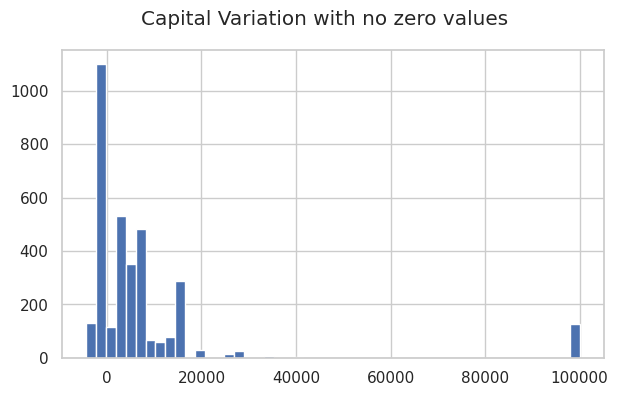

In [1106]:
capital_variation = (train_set ['capital.gain']-train_set['capital.loss'])
capital_variation_filtered= capital_variation [capital_variation!=0]
capital_variation_filtered.hist( bins=50, figsize=(7,4))
plt.suptitle('Capital Variation with no zero values')

Per verificare l'utilità di questa potenziale nuova feature si vuole valutare come la variazione di capitale possa infuenzare la variabile target.

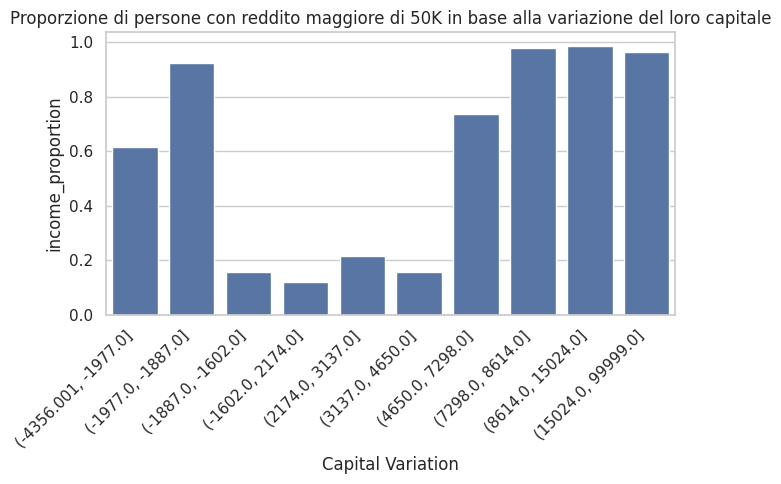

In [1107]:
import seaborn as sns
train_set_tmp= train_set.copy()
train_set_tmp['capital_variation']= capital_variation_filtered

train_set_tmp['capital_bin'] = pd.qcut(train_set_tmp['capital_variation'], q=10)
train_set_tmp['income'] = train_set_tmp['income'].map({'<=50K': 0, '>50K': 1})

proportions = train_set_tmp.groupby('capital_bin')['income'].mean().reset_index()
proportions.columns = ['capital_bin', 'income_proportion']


sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x='capital_bin', y='income_proportion', data=proportions)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Capital Variation')
plt.title('Proporzione di persone con reddito maggiore di 50K in base alla variazione del loro capitale')
plt.tight_layout()
plt.show()

Si nota che la percentuale di persone con reddito alto cresce sia per variazioni notevolmente positive di capitale, che per variazione notevolmente negative.
Una giustificazione legata a questo andamento non monotono, potrebbe essere individuata nel fatto che le persone con un reddito molto elevato siano più propense ad effettuare investimenti ad elevato rischio, che possono portare sia a guadagni che a perdite significative di capitale.

La feature **'fnlwgt' è un peso statistico** **assegnato a ciascuna istanza in un dataset demografico per garantire che il campione estratto rappresenti accuratamente la popolazione di interesse**. Questo peso è calcolato utilizzando metodi avanzati di campionamento e stratificazione per garantire che l'analisi dei dati rifletta in modo equo la diversità della popolazione.
Verifichiamo a cosa corrispondono le istanze che hanno un valore di fnlwgt maggiore di 1.

In [1108]:
train_set[train_set['fnlwgt']/1000000>1].count()

age               12
workclass         12
fnlwgt            12
education         12
education.num     12
marital.status    12
occupation        12
relationship      12
race              12
sex               12
capital.gain      12
capital.loss      12
hours.per.week    12
native.country    12
income            12
dtype: int64

Dato che la feature rappresenta un peso scalato in un range che va da 0 a 10^6, i valori di "fnlwgt" maggiori di 10^6 sembrerebbero delle inconsistenze e pertanto avendo solo 12 istanze con questo valore si è deciso di rimuoverle.

In [1109]:
class InstanceRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
            return X[ X['fnlwgt']/1000000<=1]

fnlwgtInstanceRemover = InstanceRemover()
train_set= fnlwgtInstanceRemover.fit_transform(train_set)

Per l'analisi del dataset si è deciso di eliminare la feature "final weight". Tale scelta è legata alle seguenti ragioni:
- il modello è finalizzato a fare previsioni sulle singole istanze, quindi l'inclusione di questi pesi potrebbe distorcere i risultati. Per esempio, i modelli potrebbero imparare a sovrastimare l'importanza di certe istanze basandosi sul peso piuttosto che sulle altre caratteristiche informative.
- rimuovere feature non strettamente necessarie rende il modello più semplice e comprensibile, facilitando l'interpretazione dei risultati.

In [1110]:
train_set.drop(columns=['fnlwgt'], inplace=True)
train_set.head()

<ipython-input-1110-80873cfd09a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
11219,34,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,>50K
28304,24,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
30810,39,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
10958,28,Private,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
26814,56,Private,7th-8th,4,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [1111]:
class DropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X):
        return self

    def transform(self, X):
        X.drop(columns=self.columns, inplace=True, axis=1)
        return X

In [1112]:
dropperFnlwgt = DropperTransformer(['fnlwgt'])

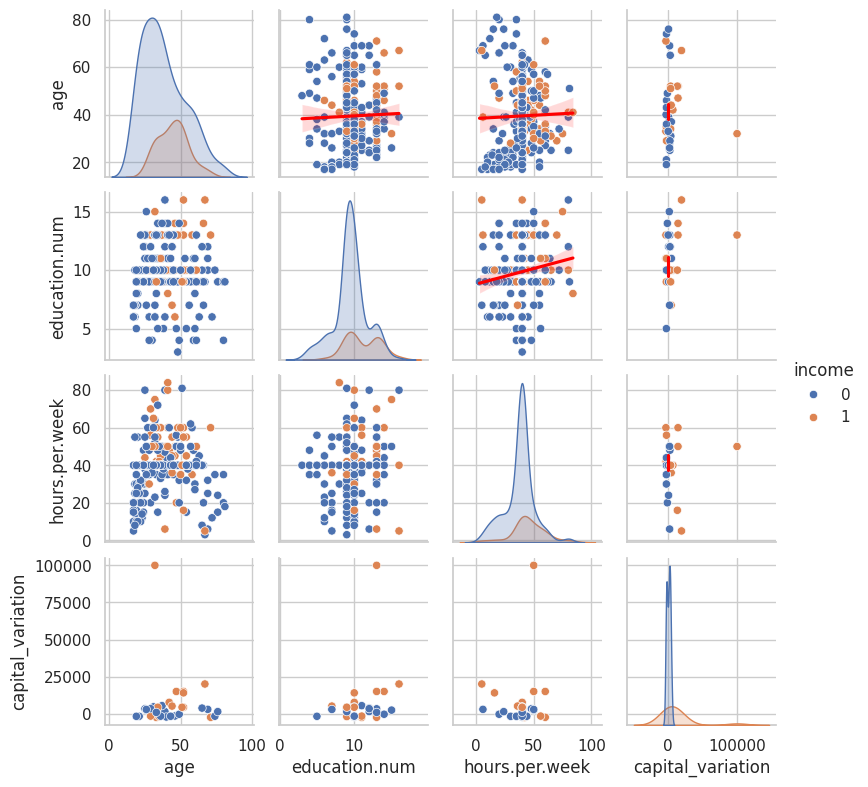

In [1113]:
import numpy as np
import seaborn as sns

train_set_num = train_set.select_dtypes(include='number')
train_set_num['income'] = train_set['income']
train_set_num= train_set_num.drop(columns=['capital.gain', 'capital.loss'])
train_set_num ['capital_variation']= capital_variation_filtered

# Converto la colonna 'income' in numeri
train_set_num['income'] = train_set_num['income'].map({'<=50K': 0, '>50K': 1})

# Campionamento di 300 punti casuali dal dataset
sampled_data = train_set_num.sample(300)

# Creazione del pairplot
pairplot = sns.pairplot(sampled_data, hue='income', height=2)

# Aggiunta della retta di regressione
for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)): # Itero attraverso tutte le combinazioni di variabili sopra la diagonale del pairplot
    sns.regplot(
        x=sampled_data.columns[j], y=sampled_data.columns[i],
        data=sampled_data, scatter=False, ax=pairplot.axes[i, j],
        line_kws={"color": "red"}
    )

plt.show()

Si nota che tutte le feature numeriche considerate risultano essere significativamente correlate con la variabile target. In tutti i grafici di dispersione a coppie, si nota una certa separazione tra le istanze relative ad aduti che guadagnano più di 50K (zona alta a destra) e quelli che ne guadagnano di meno (zona bassa a sinistra). <br>
Si nota, inoltre, **una particolare correlazione positiva tra livello di istruzione e ore settimanali di lavoro**. Chi ha un grado di istruzione più elevato, lavora di più in termini di ore.

### Permutazioni e campionamento casuale

In generale, i dataset possono essere caratterizzati da un ordinamento ben preciso, e questo comporta errori nella regressione o classificazione. Per risolvere questa problematica si effettua una permutazione delle tuple.

In [1114]:
np.random.seed(42)
data_1 = train_set.copy()

In [1115]:
train_set = data_1.sample(frac=1, random_state=42).reset_index(drop=True)
train_set.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,26,?,<=50K
1,25,Private,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
2,63,Self-emp-inc,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
4,65,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,3818,0,40,United-States,<=50K


### Analisi feature categoriche

In [1116]:
import plotly.express as px

def plot_categorical_distributions_plotly(df, categorical_columns):
    for col in categorical_columns:
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = ['Categoria', 'Frequenza']

        fig = px.bar(value_counts, x='Categoria', y='Frequenza',  width=600, height=400 , title=f'Distribuzione di {col}')
        fig.update_layout(xaxis_title=col, yaxis_title='Frequenza')
        fig.show()

# Selezione di tutte le colonne categoriche
feature_categoriche = train_set.select_dtypes(include=['object'])
plot_categorical_distributions_plotly(train_set, feature_categoriche)

### Imputing dati mancanti

Notiamo, innanzitutto, la presenza di istanze aventi come valore di feature categorica il carattere "?" che indica la presenza di un valore mancante. Per risolvere questo problema, è stato effettuato un processo di "data imputation", che ha previsto, per ogni feature la **sostituzione dei valori mancanti con il valore modale.** Usando la moda non "rompiamo" il dataset; è più un'informazione ridondante che si aggiunge.

In [1117]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

import numpy as np

train_set_1= train_set.copy()  #copia per tecnica di imputazione successiva

class MostFrequentCategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imp = None

    def fit(self, X):
      self.imp = SimpleImputer(strategy='most_frequent')
      X1 = X.replace('?', np.nan)
      categorical_cols = X.select_dtypes(include=['object']).columns
      self.imp.fit(X1[categorical_cols])
      return self

    def transform(self, X):
      X.replace('?', np.nan, inplace=True)
      categorical_cols = X.select_dtypes(include=['object']).columns
      X[categorical_cols] = self.imp.transform(X[categorical_cols])
      return X

modCategFeatImputer= MostFrequentCategoricalImputer().fit(train_set)
train_set= modCategFeatImputer.transform(train_set)

Si procede adesso con una tecnica di imputazione alternativa, più sofisticata, che prevede **l'uso di un Random Forest Classifier** per predire i valori mancanti delle variabili categoriche sulla base delle altre colonne. <br>
Per ciascuna colonna categoriale con dati categoriali, si va ad addestrare un Random Forest Classifier, considerando come colonna target la colonna da imputare. I valori mancanti vengono poi predetti sulla base del modello addestrato.
Ovviamente per poter addestrare dei modelli di Random Forest classification, è stato necessario effettuare delle codifiche temporanee dei dati categorici in dati numerici tramite codifica one-hot encoding

In [1120]:
from sklearn.ensemble import RandomForestClassifier

class RandomForestImputer(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.mapClf = {}
        self.features = features.copy()
        self.feature_to_fit = {}  # Dizionario per mantenere le feature_to_fit

    def fit(self, data_in):
        data = data_in.replace('?', np.nan)

        for colonna_da_imputare in self.features:
            feature_to_encode = [col for col in data.columns if col != colonna_da_imputare and data[col].dtype == 'object']
            data_encoded = pd.get_dummies(data, columns=feature_to_encode)

            missing_mask = data_encoded[colonna_da_imputare].isna()
            feature_to_fit = [col for col in data_encoded.columns if col != colonna_da_imputare]

            # Controllo se ci sono dati da imputare
            if not data_encoded[missing_mask].empty:
                clf = RandomForestClassifier()
                clf.fit(data_encoded[~missing_mask][feature_to_fit], data_encoded[~missing_mask][colonna_da_imputare])
                self.mapClf[colonna_da_imputare] = clf
                self.feature_to_fit[colonna_da_imputare] = feature_to_fit

        return self

    def transform(self, data):
        data.replace('?', np.nan, inplace=True)

        for colonna_da_imputare in self.features:
            if colonna_da_imputare not in data.columns:
                print(f"Colonna '{colonna_da_imputare}' non trovata nel dataset di test.")
                continue

            feature_to_encode = [col for col in data.columns if col != colonna_da_imputare and data[col].dtype == 'object']
            data_encoded = pd.get_dummies(data, columns=feature_to_encode)

            missing_mask = data_encoded[colonna_da_imputare].isna()

            # Controllo se ci sono dati da imputare
            if not missing_mask.any():
                print(f"Nessun dato da imputare per la colonna '{colonna_da_imputare}'")
                continue

            feature_to_fit = self.feature_to_fit[colonna_da_imputare]

            set1 = set(feature_to_fit)
            set2 = set(self.feature_to_fit[colonna_da_imputare])

            if set1 != set2:
                elementi_diversi = set1.symmetric_difference(set2)
                print(f"Gli elementi diversi tra le due liste sono: {elementi_diversi}")

            clf = self.mapClf[colonna_da_imputare]
            imputed_values = clf.predict(data_encoded[missing_mask][feature_to_fit])

            data.loc[missing_mask, colonna_da_imputare] = imputed_values

        return data

In [1121]:
features = ['workclass', 'occupation', 'native.country']
randForImputer = RandomForestImputer(features)
randForImputer.fit(train_set_1)
randForImputer.transform(train_set_1)

train_set_1.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,26,Philippines,<=50K
1,25,Private,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
2,63,Self-emp-inc,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
4,65,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,3818,0,40,United-States,<=50K


In [1122]:
nulls = train_set_1.isnull()
nulls.describe()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023,26023


Consideriamo le feature "education" e "education.num".

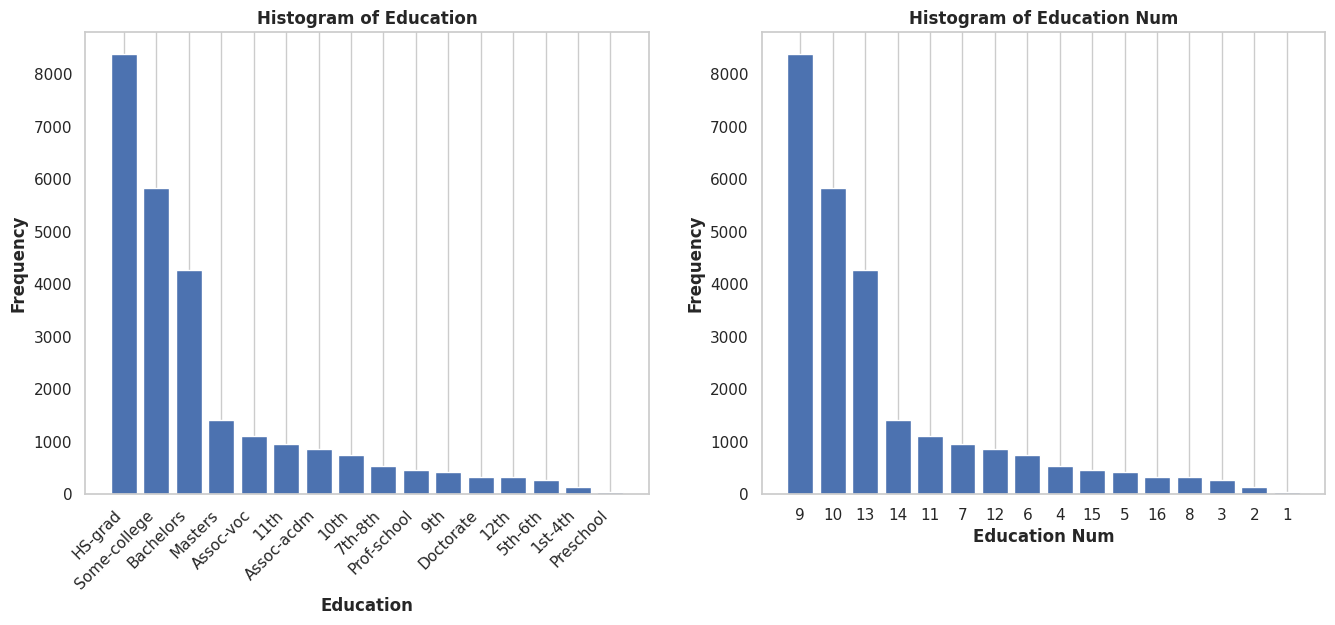

In [1123]:
from matplotlib import pyplot as plt
education_counts = train_set['education'].value_counts().sort_values(ascending=False)
education_num_counts = train_set['education.num'].value_counts().sort_values(ascending=False)
education_num_counts.index = education_num_counts.index.astype(str)

plt.figure(figsize=(16, 6))

# Istogramma per education
plt.subplot(1, 2, 1)
plt.bar(education_counts.index, education_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Education', fontweight='bold')
plt.grid(axis='y')

# Visualizzazione dell'istogramma di education.num
plt.subplot(1, 2, 2)
plt.bar(education_num_counts.index, education_num_counts.values)
plt.xlabel('Education Num', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Education Num', fontweight='bold')
plt.grid(axis='y')

plt.show()

Notiamo che hanno praticamente la stessa distribuzione. Dato che una variabile numerica è più facile da gestire si è preferito rimuovere la feature "Education".

In [1124]:
train_set.drop(columns=['education'], inplace=True)
train_set_1.drop(columns=['education'], inplace=True)

In [1125]:
dropperEducation = DropperTransformer(['education'])

A questo punto, è convieniente lanciare un ensamble learning, in particolare un "Random Forest". Il "Random Forest" è molto utile non solo per le capacità predittive che possiede, ma anche per la sua abilità nel fornire una stima in merito all'importanza delle feature nel dataset. Questa "importanza" è stabilita sulla base dell'impatto medio di una feature sulla riduzione dell'impurità. **Se una feature è poco informativa può anche essere rimossa**.

Conviene sostituire, per le feature categoriche binarie, valori 0 ed 1.

In [1126]:
# Preparazione del dataset
class Binarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
      X['income'] = X['income'].map({'<=50K': 0, '>50K': 1})
      X['sex'] = X['sex'].map({'Male': 1, 'Female': 0})
      return X

In [1127]:
binarizer = Binarizer()
train_set= binarizer.fit_transform(train_set)
train_set_1 = binarizer.fit_transform(train_set_1)

target = train_set['income'].to_frame(name='income')
train_set.drop(columns=['income'], inplace=True)
train_set_1.drop(columns=['income'], inplace=True)

Per la gestione delle variabili categoriche si è deciso di fare uso di un one-hot encoding. Altre strategie che richiedono l'assegnamento di una sequenza di interi alle varie categorie risultano essere poco ottimali dal momento che stabiliscono un ordinamento tra le varie categorie, un'operazione priva di senso nel nostro caso.

In [1128]:
class DummyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
      X = pd.get_dummies(X)
      X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
      return X

In [1129]:
dummyEncoder = DummyEncoder()
train_set=dummyEncoder.fit_transform(train_set)
train_set_1=dummyEncoder.fit_transform(train_set_1)

Il seguente Random Forest ha 500 Decision Tree, ciascuno dei quali viene addestrato su un training set costruito con rimpiazzo a partire da quello di partenza e ha un numero massimo di nodi pari a 16. L'ensemble introduce in automatico più randomicità quando costruisce gli alberi, infatti quando deve scegliere la migliore feature per suddividere un nodo, la cerca in un sottoinsieme random e non tra tutte.

In [1130]:
from sklearn.ensemble import RandomForestClassifier

def feature_importance(training_set, target):
  rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
  rnd_clf.fit(training_set, target)
  coppie = list(zip(training_set.columns, rnd_clf.feature_importances_))
  feature_importances_sorted = sorted(coppie, key=lambda x: x[1], reverse=True)
  return feature_importances_sorted

feature_importances_sorted = feature_importance(train_set, target)
for name, score in feature_importances_sorted:
    print(f"{name}: {score:.4f}")

<ipython-input-1130-0a61eb50c1c1>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



marital.status_Married-civ-spouse: 0.2029
capital.gain: 0.1513
education.num: 0.1383
relationship_Husband: 0.1246
marital.status_Never-married: 0.0583
age: 0.0575
hours.per.week: 0.0395
capital.loss: 0.0365
occupation_Exec-managerial: 0.0350
relationship_Own-child: 0.0229
sex: 0.0226
relationship_Not-in-family: 0.0209
relationship_Wife: 0.0129
occupation_Other-service: 0.0124
marital.status_Divorced: 0.0118
relationship_Unmarried: 0.0107
occupation_Prof-specialty: 0.0106
workclass_Self-emp-inc: 0.0039
occupation_Farming-fishing: 0.0031
workclass_Private: 0.0028
occupation_Handlers-cleaners: 0.0026
occupation_Machine-op-inspct: 0.0025
occupation_Craft-repair: 0.0020
native.country_Mexico: 0.0017
workclass_Federal-gov: 0.0015
workclass_Self-emp-not-inc: 0.0015
relationship_Other-relative: 0.0014
occupation_Transport-moving: 0.0011
occupation_Tech-support: 0.0010
occupation_Adm-clerical: 0.0010
race_Black: 0.0009
marital.status_Widowed: 0.0007
marital.status_Separated: 0.0007
race_White: 

Sembra conveniente rimuovere da "capital.loss" in poi tutte le feature dal momento che hanno un'importanza al di sotto del 3% circa.  
Si otterrebbe lo stesso risultato se considerassimo train_set_1 in cui si fa uso della data imputation attraverso Random Forest. L'unica piccola differenza è per la feature "capital.loss" che verrebbe scartata se filtrassimo esattamente per il 3% di significatività dal momento che la sua feature importance è "0.0296".  
COSA CAMBIEREBBE SE PROVASSIMO CON 1%?

In [1131]:
selected_features = [name for name, score in feature_importances_sorted if score > 0.03]

class FeaturesRemoverRF(BaseEstimator, TransformerMixin):
    def fit(self, X):
        return self
    def transform(self, X):
        if 'income' in X.columns:
            income = X['income']
        else:
            income = None

        X = X[selected_features]

        if income is not None and 'income' not in X.columns:
            X['income'] = income

        return X

featRemovImputer = FeaturesRemoverRF()
train_set=featRemovImputer.fit_transform(train_set)

coppie_sorted = feature_importance(train_set, target)
for name, score in coppie_sorted:
    print(f"{name}: {score:.4f}")

<ipython-input-1130-0a61eb50c1c1>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



marital.status_Married-civ-spouse: 0.2702
capital.gain: 0.2215
education.num: 0.1907
relationship_Husband: 0.1500
capital.loss: 0.0417
marital.status_Never-married: 0.0397
age: 0.0365
hours.per.week: 0.0282
occupation_Exec-managerial: 0.0215


Alla luce di ciò, si è deciso di mantenere solo queste feature.

In [1132]:
train_set_1=FeaturesRemoverRF().fit_transform(train_set_1)

La colonna "target" rimane la stessa per entrambi i dataset.

## Analisi correlazione

Dato che il dataset non è molto ampio, si potrebbe pensare di calcolare il coefficiente di Person per l'analisi di correlazione lineare tra feature.  
Dato che ci interessa predire il valore della feature 'income', si può visualizzare quanto sono correlate le atre feature con questa.

In [1133]:
full_data = pd.concat([train_set, target], axis=1)
full_data_1 = pd.concat([train_set_1, target], axis=1)

In [1134]:
corr_matrix = full_data.corr()

In [1135]:
corr_matrix['income'].sort_values(ascending=False)

income                               1.000000
marital.status_Married-civ-spouse    0.446618
relationship_Husband                 0.404250
education.num                        0.332906
age                                  0.232631
hours.per.week                       0.230164
capital.gain                         0.224064
occupation_Exec-managerial           0.214725
capital.loss                         0.153770
marital.status_Never-married        -0.317720
Name: income, dtype: float64

Sembra che le feature più correlate positivamente (al loro aumento corrisponde una variazione positiva della variabile target cioè reddito >50K) siano 'marital.status_Married-civ-spouse' (così come anticipato), e 'relationship_Husband'. Tra le feature correlate negativamente (un loro aumento comporta una diminuizione della variabile target) troviamo 'marital.status_Never-married'.  
Si ricorda che il coefficiente di Person misura il livello di correlazione lineare tra una coppia di feature, questo significa che altri tipi di dipendenze non sono prese in considerazione.  

<Axes: >

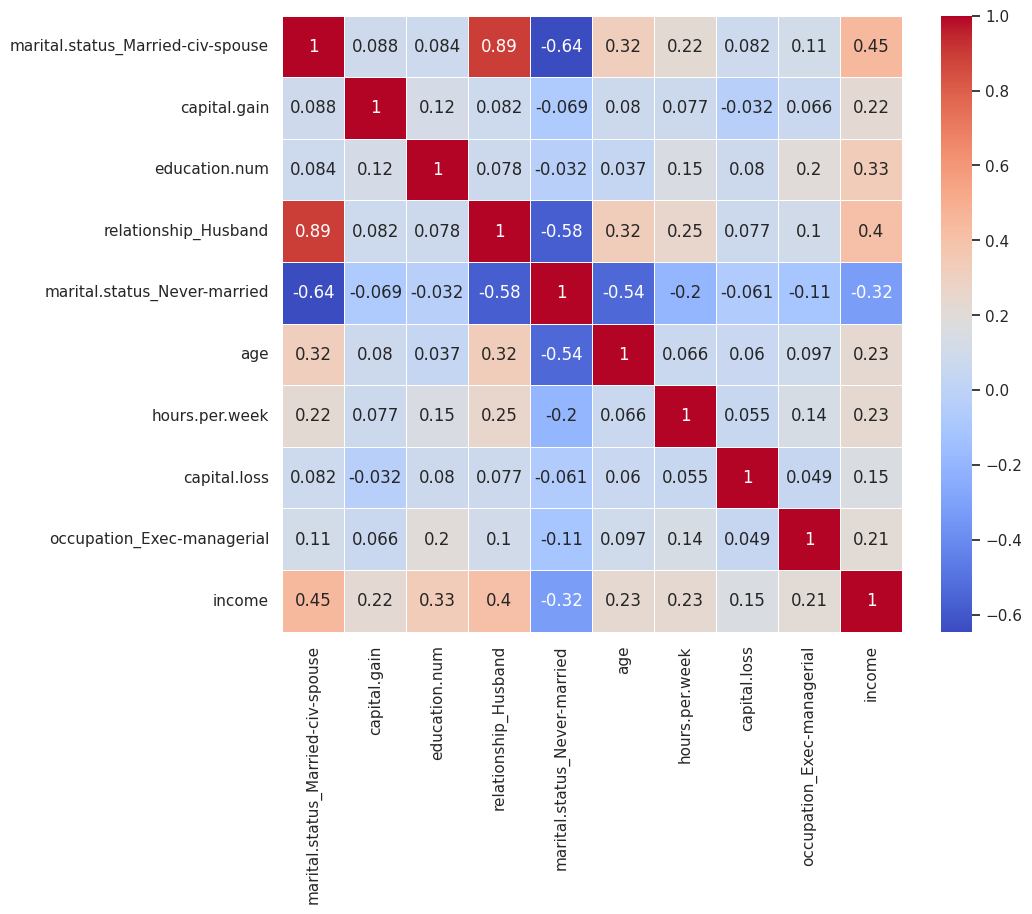

In [1136]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

Dal momento che le due feature binarie 'marital.status_Married-civ-spouse' e 'relationship_Husband', presentano una correlazione molto elevata, superiore all'89%, si è deciso di rimuoverne uno dei due. Dato che la prima ha una "feature importance" più elevata, sembra logico rimuovere la seconda feature.  
Si noti che anche la coppia di feature 'marital.status_Married-civ-spouse' e 'marital.status_Never-married' ha una correlazione negativa pari a -0.64. Dal momento che non risulta essere troppo eleveta, si è deciso di mantenere entrambe le feature.

In [1137]:
full_data = full_data.drop(columns=['relationship_Husband'])
full_data_1 = full_data_1.drop(columns=['relationship_Husband'])

Lo stesso risultato si ottiene per full_data_1.  

### Valutazione feature in base a correlazione

Valutiamo se considerare la variazione di capitale ha più senso di avere le due feature separate. <br>

In [1138]:
corr_matrix["income"].sort_values(ascending=False)

income                               1.000000
marital.status_Married-civ-spouse    0.446618
relationship_Husband                 0.404250
education.num                        0.332906
age                                  0.232631
hours.per.week                       0.230164
capital.gain                         0.224064
occupation_Exec-managerial           0.214725
capital.loss                         0.153770
marital.status_Never-married        -0.317720
Name: income, dtype: float64

In [1139]:
full_data['capital_variation'] = full_data['capital.gain'] - full_data['capital.loss']
corr_matrix = full_data.corr()
corr_matrix["income"].sort_values(ascending=False)

income                               1.000000
marital.status_Married-civ-spouse    0.446618
education.num                        0.332906
age                                  0.232631
hours.per.week                       0.230164
capital.gain                         0.224064
capital_variation                    0.214933
occupation_Exec-managerial           0.214725
capital.loss                         0.153770
marital.status_Never-married        -0.317720
Name: income, dtype: float64

Valutiamo se ha senso mantenere la nuova feature.

In [1140]:
train_set['capital_variation'] = full_data['capital_variation']

In [1141]:
coppie_sorted = feature_importance(train_set, target)
for name, score in coppie_sorted:
    print(f"{name}: {score:.4f}")

<ipython-input-1130-0a61eb50c1c1>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



marital.status_Married-civ-spouse: 0.2572
capital_variation: 0.1680
education.num: 0.1626
relationship_Husband: 0.1352
capital.gain: 0.1287
marital.status_Never-married: 0.0366
capital.loss: 0.0352
age: 0.0328
hours.per.week: 0.0247
occupation_Exec-managerial: 0.0191


Si nota come la feature importance di capital_variation sia superiore (circa 17%) alla somma delle feature importance di capital.gain e capital.loss.

In [1142]:
full_data_1['capital_variation'] = full_data_1['capital.gain'] - full_data_1['capital.loss']
train_set_1['capital_variation'] = full_data_1['capital_variation']
coppie_sorted = coppie_sorted = feature_importance(train_set_1, target)
for name, score in coppie_sorted:
    print(f"{name}: {score:.4f}")

<ipython-input-1130-0a61eb50c1c1>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



marital.status_Married-civ-spouse: 0.2568
capital_variation: 0.1686
education.num: 0.1619
relationship_Husband: 0.1352
capital.gain: 0.1281
marital.status_Never-married: 0.0366
capital.loss: 0.0349
age: 0.0333
hours.per.week: 0.0243
occupation_Exec-managerial: 0.0203


Un risultato simile viene fornito per il secondo train set.

In [1143]:
train_set.drop(columns=['capital.loss', 'capital.gain'], inplace=True)
full_data.drop(columns=['capital.loss', 'capital.gain'], inplace=True)
train_set_1.drop(columns=['capital.loss', 'capital.gain'], inplace=True)
full_data_1.drop(columns=['capital.loss', 'capital.gain'], inplace=True)

Il seguente trasformer consente di rimuovere le feature 'capital.gain', 'capital.loss', 'relationship_Husband' e 'education' e di aggiungere la feature 'capital_variation', quindi di apportare tutte le scelte progettuali fatte fino ad ora in modo del tutto automatizzato.

In [1144]:
class CleanAndAddFeatureDataset(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.features = ['capital.gain', 'capital.loss', 'relationship_Husband']
    def fit(self, X):
        return self
    def transform(self, X):
      X['capital_variation'] = X['capital.gain'] - X['capital.loss']
      X.drop(columns=self.features, inplace=True)
      return X

In [1145]:
adjustFeatureDataset = CleanAndAddFeatureDataset()

### Data imputation sull'attributo numerico capital_variation

Come osservato in precedenza **l'attributo capital_variation**, risultante dalla differenza tra capital.gain e capital.loss, **presenta oltre l'84% di feature nulle.** Dal momento che tutti questi valori nulli rappresentano dei valori mancanti, si è deciso di effettuare un processo di data imputation.  <br>
E' stato utilizzato un **KNNImputer**: il valore mancante di un campione viene imputato utilizzando il valore medio dei k vicini più vicini trovati nel set di addestramento. Due campioni sono considerati vicini se le loro feature non mancanti sono simili.

In [1146]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

full_data_1['capital_variation'] = full_data_1['capital_variation'].replace(0, np.nan)

imputer = KNNImputer(weights= 'distance',n_neighbors=20)
imputer.fit(full_data_1)
full_data_transformed = imputer.transform(full_data_1)

full_data_1= pd.DataFrame(full_data_transformed, columns=full_data_1.columns)

full_data_1.head()

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
0,1.0,9.0,0.0,39.0,26.0,0.0,0.0,5437.219487
1,0.0,11.0,0.0,25.0,40.0,0.0,0.0,1689.280720
2,1.0,6.0,0.0,63.0,50.0,0.0,0.0,3866.482010
3,0.0,9.0,1.0,25.0,25.0,0.0,0.0,-146.885927
4,1.0,12.0,0.0,65.0,40.0,1.0,0.0,3818.000000


Per il dataset full_data, in cui la data imputation per le feature categoriche era stata fatta attraverso la moda, si è deciso di imputare i dati mancanti della feature "capital_variation" con la media.

In [1147]:
class MeanImputerCap(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imp = None

    def fit(self, X):
      self.imp = SimpleImputer(strategy='mean')
      X1 = X[['capital_variation']].replace(0, np.nan)
      self.imp.fit(X1)
      return self

    def transform(self, X):
      X['capital_variation'].replace(0, np.nan, inplace=True)
      X['capital_variation'] = self.imp.transform(X[['capital_variation']])
      return X

meanImpCapVar= MeanImputerCap().fit(full_data)
full_data= meanImpCapVar.transform(full_data)

Confrontiamo le distribuzioni della feature nei due dataset per verificare se c'è una netta variazione.

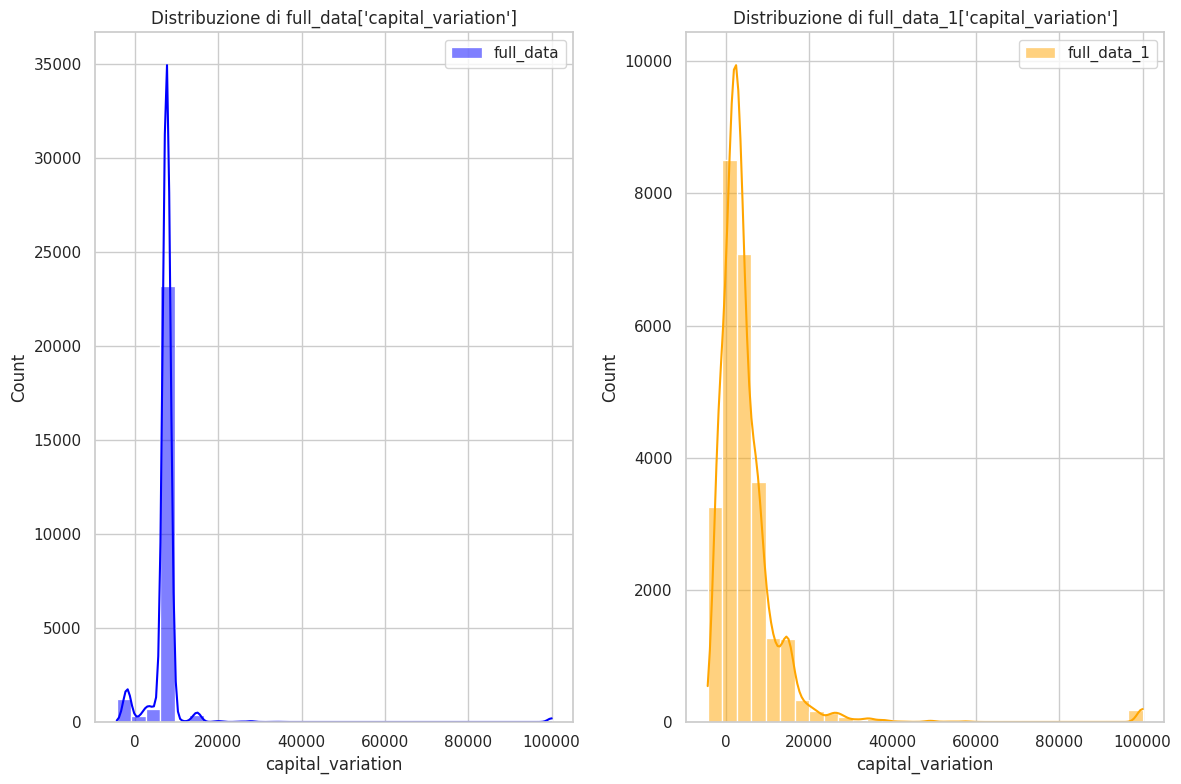

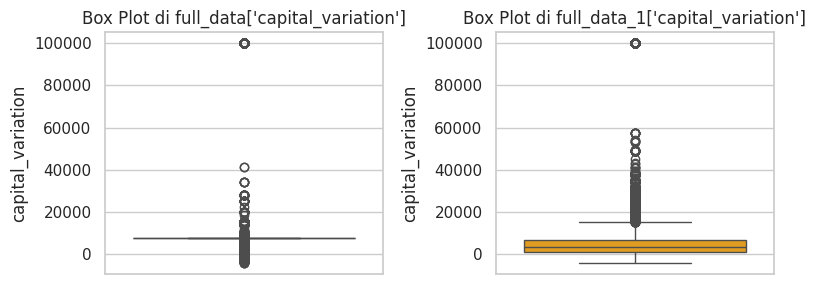

<ipython-input-1148-cc00d684508c>:34: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-1148-cc00d684508c>:35: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




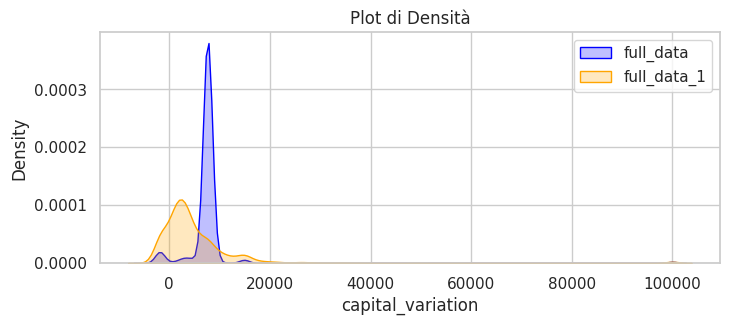

In [1148]:
# Visualizzazione degli histogrammi
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(full_data['capital_variation'], kde=True, bins=30, color='blue', label='full_data')
plt.title('Distribuzione di full_data[\'capital_variation\']')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(full_data_1['capital_variation'], kde=True, bins=30, color='orange', label='full_data_1')
plt.title('Distribuzione di full_data_1[\'capital_variation\']')
plt.legend()

plt.tight_layout()
plt.show()

# Visualizzazione dei box plot
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.boxplot(y=full_data['capital_variation'], color='blue')
plt.title('Box Plot di full_data[\'capital_variation\']')

plt.subplot(1, 2, 2)
sns.boxplot(y=full_data_1['capital_variation'], color='orange')
plt.title('Box Plot di full_data_1[\'capital_variation\']')

plt.tight_layout()
plt.show()

# Visualizzazione dei plot di densità
plt.figure(figsize=(8, 3))

sns.kdeplot(full_data['capital_variation'], shade=True, color='blue', label='full_data')
sns.kdeplot(full_data_1['capital_variation'], shade=True, color='orange', label='full_data_1')
plt.title('Plot di Densità')
plt.legend()

plt.show()

La distribuzione di full_data (blu) è molto più concentrata e presenta un picco molto pronunciato, a differenza della distribuzione di full_data_1 (arancione) che è più larga e piatta, indicando una maggiore dispersione dei valori. Possiamo dire che l'imputing dovuto al KNN sembri essere più "moderato" nella scelta dei valori da assegnare.

Aggiorno le corrispettive colonne nei dataset di addestramento.

In [1149]:
train_set['capital_variation'] = full_data['capital_variation']
train_set_1['capital_variation'] = full_data_1['capital_variation']

## Outlier detection

In questa sezione si cerca di esplorare il dataset per individuare la presenza di outlayer.  
Si considerano le seguito le feature numeriche e se ne visualizza la loro distribuzione attraverso un box plot.

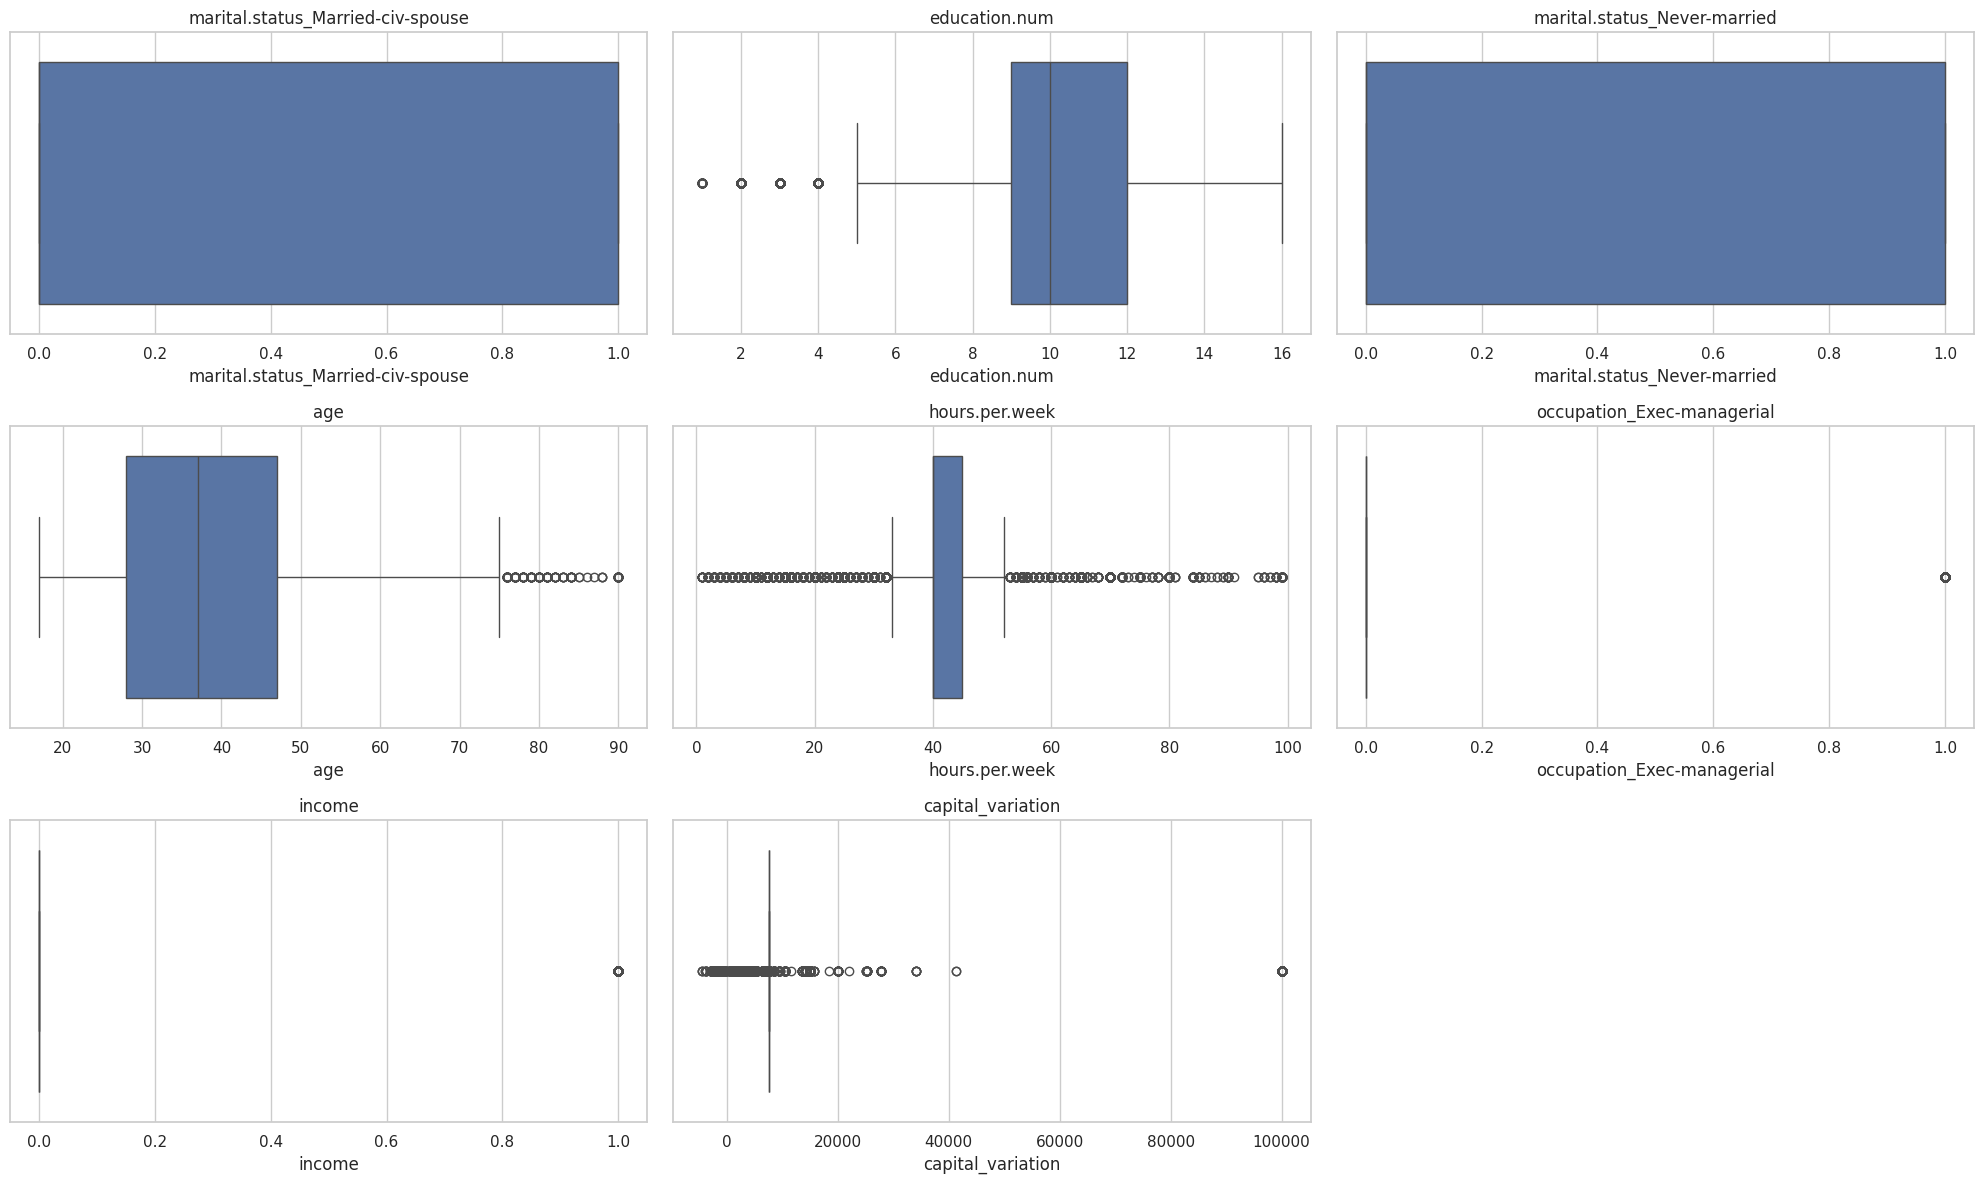

In [1150]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(full_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=full_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Ovviamente si escludono dalla valutazione le feature cateogoriche binarie.  
All'interno dei bloxplot notiamo sicuramente dei valori molto distanti da quello medio. In particolare si fa uso dello Z-score per valutare la distanza di ogni datapoint dal valore medio in termini di numero di deviazioni standard.  
Per l'applicazione di questa tecnica si è deciso di escludere le feature binarie dal momento che assumono solo due valori (0 e 1). Calcolare lo Z-score per queste feature potrebbe non avere molto senso, poiché la media e la deviazione standard di una variabile binaria non forniscono informazioni significative sugli outlier.

In [1151]:
def outliers_detection_zscore(train_set, zscore_threshold=3): # zscore_threshold è una soglia per lo Z-score (maggiore è la soglia e meno saranno gli outlayer filtrati)
  # Rimuovo le feature binarie
  non_binary_columns = [col for col in train_set.columns if train_set[col].nunique() > 2]
  train_set_non_binary = train_set[non_binary_columns]

  # Calcolo media e deviazione standard
  means = train_set_non_binary.mean()
  stds = train_set_non_binary.std()

  # Calcolo Z-score
  z_scores = ((train_set_non_binary - means) / stds)

  # Adesso rileviamo gli outlater sulla base di zscore_threshold
  outliers = (np.abs(z_scores) > zscore_threshold).any(axis=1)

  return outliers

In [1152]:
outliers = outliers_detection_zscore(train_set)

# Filtriamo gli outlayer dal dataset
filtered_data = full_data[~outliers]
filtered_data.describe()

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
count,25278.000000,25278.000000,25278.000000,25278.000000,25278.000000,25278.000000,25278.000000,25278.000000
mean,0.456286,10.120223,0.331751,38.198908,40.037582,0.123704,0.237994,7158.385060
std,0.498095,2.476807,0.470851,13.274879,11.108318,0.329251,0.425864,2518.773431
min,0.000000,3.000000,0.000000,17.000000,4.000000,0.000000,0.000000,-4356.000000
25%,0.000000,9.000000,0.000000,27.000000,40.000000,0.000000,0.000000,7623.393548
50%,0.000000,10.000000,0.000000,37.000000,40.000000,0.000000,0.000000,7623.393548
75%,1.000000,12.000000,1.000000,47.000000,45.000000,0.000000,0.000000,7623.393548
max,1.000000,16.000000,1.000000,79.000000,77.000000,1.000000,1.000000,27828.000000


Il numero di istanze è diminuito di circa 750 rispetto alle 26023 complessive.

A questo punto occorre verificare se il dataset non si è sbilanciato ulteriormente, dato che già lo era.

In [1153]:
filtered_data_income_percent = filtered_data['income'].value_counts(normalize=True) * 100
train_set_income_percent = full_data['income'].value_counts(normalize=True) * 100

print("Percentuale di income in filtered_data:")
print(filtered_data_income_percent)
print("\nPercentuale di income in full_data:")
print(train_set_income_percent)

Percentuale di income in filtered_data:
income
0    76.200649
1    23.799351
Name: proportion, dtype: float64

Percentuale di income in full_data:
income
0    75.905929
1    24.094071
Name: proportion, dtype: float64


A questo punto ci chiediamo se effettivamente ha senso rimuovere ben 745 istanze considerate outlayer a fronte di un lieve sbilanciamento del trainset.  
Nel seguito si fa riferimento al calcolo dello Z-score sostituendo la standard deviation con la MAD o median absolute deviation. Questa misura risulta essere molto meno sensibile alla presenza degli outlayer, quindi ci aspettiamo che le tuple da rimuovere saranno in numero maggiori rispetto alle precedenti, sebbene la soglia rimanga la stessa. Si fa uso di una costante moltiplicativa pari a 1.4826 che è un fattore di normalizzazione per trasformare la MAD in una stima approssimativa della deviazione standard su una distribuzione gaussiana.  
In generale avremo:  
mod_zscore[i] = (x[i]-M)/(1.4826*MAD),  
dove M indica il vettore delle mediane in corrispondenza delle feature.

In [1154]:
def outliers_detection_zscore_mod(train_set, zscore_threshold=3): # zscore_threshold è una soglia per lo Z-score (maggiore è la soglia e meno saranno gli outlayer filtrati)
    # Rimuovo le feature binarie
    non_binary_columns = [col for col in train_set.columns if train_set[col].nunique() > 2]
    train_set_non_binary = train_set[non_binary_columns]

    median_data = np.median(train_set_non_binary, axis=0)
    dev_from_median = train_set_non_binary - median_data
    mad = np.median(np.abs(dev_from_median), axis=0)
    mod_zscore = dev_from_median / (1.4826 * mad)

    # Adesso rileviamo gli outlater sulla base di zscore_threshold
    outliers = np.abs(mod_zscore) > zscore_threshold
    outliers = outliers.any(axis=1)

    return outliers

In [1155]:
outliers_mod = outliers_detection_zscore_mod(train_set)

# Filtriamo gli outlayer dal dataset
filtered_data_mod = full_data[~outliers_mod]
filtered_data_mod.describe()

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
count,16137.000000,16137.000000,16137.000000,16137.000000,16137.000000,16137.000000,16137.000000,1.613700e+04
mean,0.431059,10.203445,0.338663,37.451571,40.700316,0.120964,0.194088,7.623394e+03
std,0.495240,1.931863,0.473270,12.181099,4.712013,0.326096,0.395509,1.819046e-12
min,0.000000,6.000000,0.000000,17.000000,27.000000,0.000000,0.000000,7.623394e+03
25%,0.000000,9.000000,0.000000,28.000000,40.000000,0.000000,0.000000,7.623394e+03
50%,0.000000,10.000000,0.000000,36.000000,40.000000,0.000000,0.000000,7.623394e+03
75%,1.000000,12.000000,1.000000,46.000000,40.000000,0.000000,0.000000,7.623394e+03
max,1.000000,14.000000,1.000000,81.000000,53.000000,1.000000,1.000000,7.623394e+03


Sicuramente gli outliers sono molti di più proprio come ci aspettavamo.  

In [1156]:
is_subset = filtered_data.isin(filtered_data_mod).all().all()

if is_subset:
    print("filtered_data è un sottoinsieme di filtered_data_mod.")
else:
    print("filtered_data non è un sottoinsieme di filtered_data_mod.")

filtered_data non è un sottoinsieme di filtered_data_mod.


Nonostante la misura di rilevamento sia più restrittiva, ciò non implica che le tuple considerate anomale con il mod_zscore siano almeno quelle dello zscore.

In [1157]:
# Trova le righe presenti solo in filtered_data_mod
difference_mod = filtered_data_mod[~filtered_data_mod.apply(tuple, axis=1).isin(filtered_data.apply(tuple, axis=1))]

# Trova le righe presenti solo in filtered_data
difference_data = filtered_data[~filtered_data.apply(tuple, axis=1).isin(filtered_data_mod.apply(tuple, axis=1))]

In [1158]:
difference_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2598 to 17383
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   marital.status_Married-civ-spouse  3 non-null      int64  
 1   education.num                      3 non-null      int64  
 2   marital.status_Never-married       3 non-null      int64  
 3   age                                3 non-null      int64  
 4   hours.per.week                     3 non-null      int64  
 5   occupation_Exec-managerial         3 non-null      int64  
 6   income                             3 non-null      int64  
 7   capital_variation                  3 non-null      float64
dtypes: float64(1), int64(7)
memory usage: 216.0 bytes


In [1159]:
difference_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9144 entries, 0 to 26020
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   marital.status_Married-civ-spouse  9144 non-null   int64  
 1   education.num                      9144 non-null   int64  
 2   marital.status_Never-married       9144 non-null   int64  
 3   age                                9144 non-null   int64  
 4   hours.per.week                     9144 non-null   int64  
 5   occupation_Exec-managerial         9144 non-null   int64  
 6   income                             9144 non-null   int64  
 7   capital_variation                  9144 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 642.9 KB


Una cosa è certa, mod_zscore copre comunque molte più tuple di quelle zscore piuttosto che il contrario, proprio come ci aspettavamo dal momento che mod_zscore è una misura di rilevamento più robusta (**la deviazione standard è più influenzata dagli outliers rispetto alla deviazione mediana assoluta a causa della sua dipendenza dal quadrato delle deviazioni dalla media**).

In [1160]:
filtered_data_income_percent = filtered_data_mod['income'].value_counts(normalize=True) * 100
train_set_income_percent = full_data['income'].value_counts(normalize=True) * 100

print("Percentuale di income in filtered_data:")
print(filtered_data_income_percent)
print("\nPercentuale di income in full_data:")
print(train_set_income_percent)

Percentuale di income in filtered_data:
income
0    80.591188
1    19.408812
Name: proportion, dtype: float64

Percentuale di income in full_data:
income
0    75.905929
1    24.094071
Name: proportion, dtype: float64


Sebbene la rilevazione degli outlayer sia più robusta, lo sbilanciamento rispetto alla variabile target ottenuto è molto più risentito, e pertanto si è deciso di considerare lo zscore come misura di rilevamento degli outlayer.

### Rilevazione degli outliers attraverso DBSCAN

La tecnica etichetta i punti in core point, border point e noise point. I noise point rappresentano gli outlayer. Ovviamente questa "classificazione" dei punti dipende fortemente da come vengono inizializzati i parametri eps (raggio di un intorno) e min_samples (numero minimo di punti che devono stare nell'intorno di raggio eps per considerare un punto come core point).

Per l'individuazione di eps, l'idea è quella di usare il grafico della distanza dei k-nearest neighbors.  
Parto con k=4, perché DBSCAN richiede almeno 4 punti (incluso il punto stesso) per formare un cluster, ordino le distanze in ordine crescente e infine traccio un grafico delle distanze ordinate. L'angolo del ginocchio nel grafico suggerisce un buon valore per epsilon.  

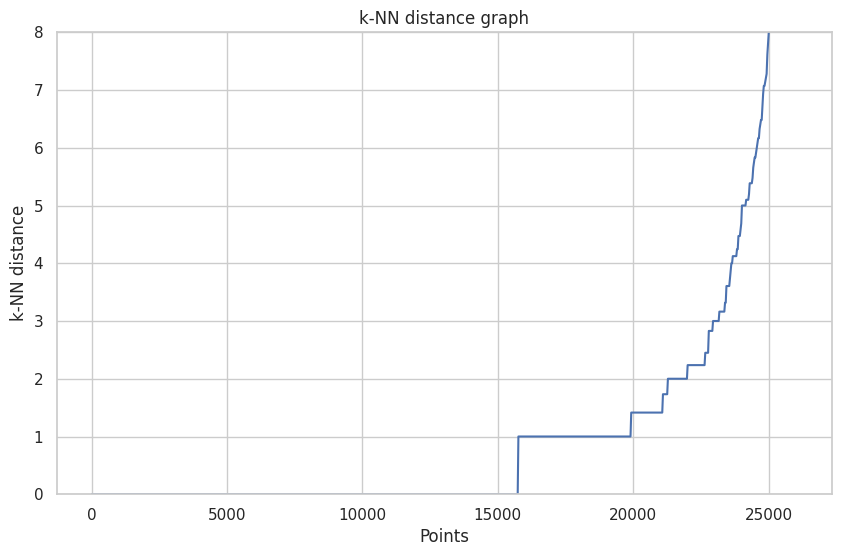

In [1161]:
from sklearn.neighbors import NearestNeighbors

def knn_distance_graph(train_set, k=4, limit_y=10):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(train_set_non_binary)
    distances, indices = neighbors_fit.kneighbors(train_set_non_binary)

    # Ordino le distanze e traccio il grafico
    distances = np.sort(distances[:, k-1], axis=0)

    # Estraggo un campione di 1000 punti per evitare problemi di dimensione del grafico
    sample_indices = np.linspace(0, len(distances) - 1, 1000, dtype=int)
    sampled_distances = distances[sample_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(sample_indices, sampled_distances)
    plt.xlabel('Points')
    plt.ylabel('k-NN distance')
    plt.title('k-NN distance graph')
    plt.ylim(0, limit_y)  # Limito l'asse y per evidenziare i valori più significativi
    plt.show()

non_binary_columns = [col for col in train_set.columns if train_set[col].nunique() > 2]
train_set_non_binary = train_set[non_binary_columns]
knn_distance_graph(train_set_non_binary, 4, 8)

Sembra che porre eps=2 sia una scelta sensata.  
Per quanto rigurda min_samples invece, un valore comune è 2*dim, dove dim è la dimensionalità del dataset.

In [1162]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=2*4)

# Lancio DBSCAN
labels = dbscan.fit_predict(train_set_non_binary)

# Le anomalie vengono etichettate come -1 dall'algoritmo
anomalies = train_set_non_binary[labels == -1]

anomalies.describe()

,education.num,age,hours.per.week,capital_variation
count,4647.000000,4647.000000,4647.000000,4647.000000
mean,10.313105,45.879062,42.805036,7616.360582
std,3.389846,15.448873,18.935792,16482.031572
min,1.000000,17.000000,1.000000,-4356.000000
25%,9.000000,34.000000,35.000000,-1092.000000
50%,10.000000,44.000000,40.000000,7298.000000
75%,13.000000,57.000000,50.000000,7623.393548
max,16.000000,90.000000,99.000000,99999.000000


Visualizziamo come variano le distribuzione del nuovo dataset senza considerare gli outliers.

In [1163]:
train_labels = dbscan.labels_
test_anomalies_mask = train_labels == -1

# Applica la maschera delle anomalie al dataset
filtered_data_dbscan = full_data[~test_anomalies_mask]
filtered_data_dbscan.describe()

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
count,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000
mean,0.429407,10.030314,0.357083,36.938295,39.908074,0.115036,0.197184,7624.922468
std,0.495003,2.361409,0.479151,12.645655,10.269574,0.319072,0.397882,549.971465
min,0.000000,1.000000,0.000000,17.000000,1.000000,0.000000,0.000000,-1902.000000
25%,0.000000,9.000000,0.000000,27.000000,40.000000,0.000000,0.000000,7623.393548
50%,0.000000,10.000000,0.000000,36.000000,40.000000,0.000000,0.000000,7623.393548
75%,1.000000,12.000000,1.000000,46.000000,43.000000,0.000000,0.000000,7623.393548
max,1.000000,16.000000,1.000000,83.000000,80.000000,1.000000,1.000000,15024.000000


In [1164]:
filtered_data_income_percent = filtered_data_dbscan['income'].value_counts(normalize=True) * 100
train_set_income_percent = full_data['income'].value_counts(normalize=True) * 100

print("Percentuale di income in filtered_data_dbscan:")
print(filtered_data_income_percent)
print("\nPercentuale di income in full_data:")
print(train_set_income_percent)

Percentuale di income in filtered_data_dbscan:
income
0    80.281624
1    19.718376
Name: proportion, dtype: float64

Percentuale di income in full_data:
income
0    75.905929
1    24.094071
Name: proportion, dtype: float64


Si nota come lo sbilanciamento rispetto alla variabile target sia ancora più accentuato.  

Valutiamo l'intersezione tra tutti questi gruppi di outlayer che abbiamo individuato con le diverse tecniche.

In [1165]:
# Creazione della maschera finale
final_mask = test_anomalies_mask & outliers_mod & outliers
filtered_data_final = full_data[~final_mask]
filtered_data_final.describe()

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
count,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000
mean,0.456402,10.093767,0.331313,38.236956,40.056662,0.123397,0.237231,7160.873498
std,0.498105,2.515850,0.470695,13.308154,11.201977,0.328898,0.425394,2512.253753
min,0.000000,1.000000,0.000000,17.000000,1.000000,0.000000,0.000000,-4356.000000
25%,0.000000,9.000000,0.000000,27.000000,40.000000,0.000000,0.000000,7623.393548
50%,0.000000,10.000000,0.000000,37.000000,40.000000,0.000000,0.000000,7623.393548
75%,1.000000,12.000000,1.000000,47.000000,45.000000,0.000000,0.000000,7623.393548
max,1.000000,16.000000,1.000000,83.000000,80.000000,1.000000,1.000000,27828.000000


La riduzione è di circa 610 istanze.

In [1166]:
filtered_data_income_percent = filtered_data_final['income'].value_counts(normalize=True) * 100
train_set_income_percent = full_data['income'].value_counts(normalize=True) * 100

print("Percentuale di income in filtered_data_final:")
print(filtered_data_income_percent)
print("\nPercentuale di income in full_data:")
print(train_set_income_percent)

Percentuale di income in filtered_data_final:
income
0    76.276855
1    23.723145
Name: proportion, dtype: float64

Percentuale di income in full_data:
income
0    75.905929
1    24.094071
Name: proportion, dtype: float64


Non male aver rimosso circa 610 istanze a discapito di un lieve aggravio sul bilanciamento del dataset!   

Le stesse operazioni possono essere condotte sinteticamente sull'altro dataset.  
Individuiamo per prima cosa la curva a gomito per una buona selezione del parametro eps.

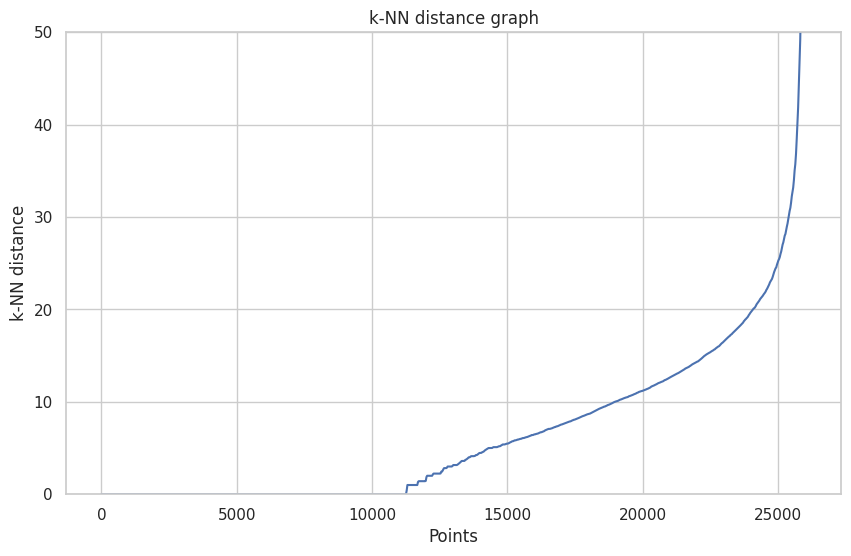

In [1167]:
non_binary_columns = [col for col in train_set_1.columns if train_set_1[col].nunique() > 2]
train_set_non_binary = train_set_1[non_binary_columns]
knn_distance_graph(train_set_non_binary, 4, 50)

In questo caso un buon valore di eps sembra 20! Ben superiore rispetto al dataset precedente. Probabilmente l'utilizzo del knn per l'imputazione dei dati ha indotto una maggiore compattezza dei punti nello spazio, proprio come era deducibile dal grafico delle distribuzioni rispetto all'uso della media classica. Questa maggiore compattezza richiede un raggio di espansione maggiore al fine di rilevare gli outlayer.

In [1168]:
dbscan = DBSCAN(eps=20, min_samples=2*4)
labels = dbscan.fit_predict(train_set_non_binary)
anomalies = train_set_non_binary[labels == -1]
train_labels = dbscan.labels_
test_anomalies_mask = train_labels == -1

final_mask_1 = test_anomalies_mask & outliers_detection_zscore_mod(train_set_1) & outliers_detection_zscore(train_set_1)
filtered_data_final = full_data_1[~final_mask_1]

filtered_data_income_percent = filtered_data_final['income'].value_counts(normalize=True) * 100
train_set_income_percent = full_data_1['income'].value_counts(normalize=True) * 100

print("Percentuale di income in filtered_data_final:")
print(filtered_data_income_percent)
print("\nPercentuale di income in full_data_1:")
print(train_set_income_percent)

filtered_data_final.describe()

Percentuale di income in filtered_data_final:
income
0.0    76.006095
1.0    23.993905
Name: proportion, dtype: float64

Percentuale di income in full_data_1:
income
0.0    75.905929
1.0    24.094071
Name: proportion, dtype: float64


,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
count,25594.000000,25594.000000,25594.000000,25594.000000,25594.000000,25594.000000,25594.000000,25594.000000
mean,0.458154,10.084356,0.330116,38.332891,40.066109,0.127374,0.239939,4964.839120
std,0.498256,2.554443,0.470264,13.399004,11.267554,0.333398,0.427054,9682.956802
min,0.000000,1.000000,0.000000,17.000000,1.000000,0.000000,0.000000,-4356.000000
25%,0.000000,9.000000,0.000000,28.000000,40.000000,0.000000,0.000000,1054.208986
50%,0.000000,10.000000,0.000000,37.000000,40.000000,0.000000,0.000000,3020.763907
75%,1.000000,12.000000,1.000000,47.000000,45.000000,0.000000,0.000000,6626.812694
max,1.000000,16.000000,1.000000,90.000000,99.000000,1.000000,1.000000,99999.000000


Come ci aspettavamo, la riduzione complessiva del dataset è minore, di circa 430 istanze.

Applichiamo la rimozione degli outlayer sui due dataset.

In [1169]:
full_data = full_data[~final_mask]
full_data_1 = full_data_1[~final_mask_1]

## Data tranformation

Riconsideriamo solo feature numeriche ed effettuiamo lo scaling di quest'ultime, cioè riconduciamo tutte le feature ad una scala comune. Gli algoritmi di machine e deep learning preferiscono lavorare su dati scalati cioè che hanno uno stesso range perchè in generale le deviazioni standard possono intaccare negativamente il modello, oppure alcune architetture di machine learning quando vedono due valori in range molto diversi attribuiscono un peso maggiore al valore più grande quando in realtà le feature sono importanti allo stesso modo.  

Esistono diverse strategie di scaling, quella più usata è lo standard scaling (ha delle proprietà aggiuntive migliori).

In [1170]:
full_data.describe()

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,income,capital_variation
count,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000,25414.000000
mean,0.456402,10.093767,0.331313,38.236956,40.056662,0.123397,0.237231,7160.873498
std,0.498105,2.515850,0.470695,13.308154,11.201977,0.328898,0.425394,2512.253753
min,0.000000,1.000000,0.000000,17.000000,1.000000,0.000000,0.000000,-4356.000000
25%,0.000000,9.000000,0.000000,27.000000,40.000000,0.000000,0.000000,7623.393548
50%,0.000000,10.000000,0.000000,37.000000,40.000000,0.000000,0.000000,7623.393548
75%,1.000000,12.000000,1.000000,47.000000,45.000000,0.000000,0.000000,7623.393548
max,1.000000,16.000000,1.000000,83.000000,80.000000,1.000000,1.000000,27828.000000


E' evidente come 'capital.gain' abbia una media nettamente superiore a 'education.num', 'age' o 'hours.per.week'.  
Nella standardizzazione delle feature bisogna stare attenti ad escludere quelle binarie.

In [1171]:
from sklearn.preprocessing import StandardScaler

non_binary_columns = [column for column in full_data.columns if full_data[column].nunique() != 2]

scaler = StandardScaler()
scaler.fit(full_data[non_binary_columns])
full_data[non_binary_columns] = scaler.transform(full_data[non_binary_columns])

scaler_1 = StandardScaler()
scaler.fit(full_data_1[non_binary_columns])
full_data_1[non_binary_columns] = scaler.transform(full_data_1[non_binary_columns])

Da notare che l'unica trasformazione condotta sulla variabile target è stata in merito alla codifica one-hot.

##Training dei modelli e valutazione delle prestazioni

Terminata la fase di preprocessing e di trasformazione del trainig set, si procede con l'addestramento di diversi modelli e con il confronto delle relative prestazioni.

In prima istanza risulta necessario effettuare sul test set le stesse operazioni effettuate sul training set, tenendo conto di non dover riaddestrare i diversi trasformer sul test set, ma di utilizzare i trasformer addestrati sul training set per modificare il test set.

In [1172]:
copyTran = test_set.copy()

In [1178]:
test_set = copyTran.copy()

In [1179]:
from sklearn.pipeline import Pipeline

# Shuffle del test set
test_set.sample(frac=1, random_state=42).reset_index(drop=True)

test_set_1 = test_set.copy()

# Creazione pipeline (una per ogni tipologia di training set)
pipeline = Pipeline([
        ('duplicatedRemover', removeDuplicate),
        ('instanceRemover', fnlwgtInstanceRemover),
        ('dropperFnlwgtImp', dropperFnlwgt),
        ('modCategFeat', modCategFeatImputer),
        ('dropperEdu', dropperEducation),
        ('binarizerImp', binarizer),
        ('dummyImp', dummyEncoder),
        ('featureRemovImp', featRemovImputer),
        ('adjusterFeature', adjustFeatureDataset),
        ('imputerMeanCapVar', meanImpCapVar),
        ])
test_set = pipeline.transform(test_set)

test_set[non_binary_columns] = scaler.transform(test_set[non_binary_columns])


pipeline_1= Pipeline([
        ('duplicatedRemover', removeDuplicate),
        ('instanceRemover', fnlwgtInstanceRemover),
        ('dropperFnlwgt', dropperFnlwgt),
        ('randFImpCateg', randForImputer),
        ('dropperEdu', dropperEducation),
        ('binarizerImp', binarizer),
        ('dummyImp', dummyEncoder),
        ('featureRemovImp', featRemovImputer),
        ('adjusterFeature', adjustFeatureDataset),
        ])
test_set_1 = pipeline_1.transform(test_set_1)

test_set_1['capital_variation'] = test_set_1['capital_variation'].replace(0, np.nan)
test_set_1_transformed = imputer.transform(test_set_1)
test_set_1= pd.DataFrame(test_set_1_transformed, columns=test_set_1.columns)

test_set_1[non_binary_columns] = scaler.transform(test_set_1[non_binary_columns])


# Estraggo feature target
target_test = test_set['income']

# Rimuovo feature target dai test set
test_set.drop(columns=['income'], inplace=True)
test_set_1.drop(columns=['income'], inplace=True)

<ipython-input-1131-8a80c3803863>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1131-8a80c3803863>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1182]:
test_set

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,capital_variation
10489,0,1.141424,1,-0.771184,0.437893,0,0.274566
25652,0,-0.424506,1,-1.442888,-2.135919,0,0.274566
12243,1,1.141424,0,0.646860,0.437893,1,0.274566
25487,0,2.315871,1,1.169297,-0.005867,1,0.274566
5091,0,-0.424506,0,0.646860,-0.005867,0,0.274566
...,...,...,...,...,...,...,...
6092,1,1.141424,0,-0.398014,0.881654,0,0.274566
28260,0,-0.424506,0,1.467833,-0.183372,0,0.274566
2419,1,-0.033024,0,-0.024845,-0.005867,0,0.281238
32531,1,-0.424506,0,-0.547282,-0.005867,0,0.274566


In [1183]:
test_set_1

,marital.status_Married-civ-spouse,education.num,marital.status_Never-married,age,hours.per.week,occupation_Exec-managerial,capital_variation
0,0.0,1.141424,1.0,-0.771184,0.437893,0.0,-0.151344
1,0.0,-0.424506,1.0,-1.442888,-2.135919,0.0,-0.431098
2,1.0,1.141424,0.0,0.646860,0.437893,1.0,-0.709181
3,0.0,2.315871,1.0,1.169297,-0.005867,1.0,1.103601
4,0.0,-0.424506,0.0,0.646860,-0.005867,0.0,-0.401134
...,...,...,...,...,...,...,...
6506,1.0,1.141424,0.0,-0.398014,0.881654,0.0,-0.213972
6507,0.0,-0.424506,0.0,1.467833,-0.183372,0.0,0.158098
6508,1.0,-0.033024,0.0,-0.024845,-0.005867,0.0,0.281238
6509,1.0,-0.424506,0.0,-0.547282,-0.005867,0.0,-0.249989


## Tips

Usually, if a model yield poor performance, the first thing to do is to try with another model. (Obviously, you first need to check if your results are correct, i.e., you are not messed up with something in your model or with the data preparation stack)

In generale quando usiamo train set e validation set, possiamo intervenire sul modello e cambiarlo. Quando passiamo al test set non si puo' più tornare indietro per prendere delle decisioni su come il modello performa su questo. Potrebbe infatti contenere un record sbagliato, e quindi modifcando il modello commetteremmo un errore.

A better way to evaluate the performance of a model during the training phase is to use cross-validation, as it returns more reliable measures.

After you tried a number of different solutions, you end up with a short list of promising models (modelli con architetture diverse).
The goal is now to try to boost their performance via parameter tuning. La GridSearchCV prova a fare cross validation ma cambiando ogni poco i parametri.
Questa operazione e' consigliata farla verso la fine del progetto quando abbiamo un certo numero di configurazioni del modello candidati ad essere quelli finali. Per spremerli ancora di piu', cioè capire quale tra questi risulta essere il migliore, si usa la GridSearchCV. Cosi' facendo individuiamo una configurazione ottimale per quel modello. Questa operazione può essere fatta con un modello di una qualsiasi architettura (e' utile infatti considerare modelli complementari, cioè di diversa natura).  

Il modello con la configurazione migliore è individuato nel seguente modo: per ogni configurazione viene creato un modello che viene addestrato in cross validation. Quello che ha la media degli errori più bassa viene restituito.
Nella documentazione di ogni modello ci sono le configurazioni che vale la pena di piu' provare.

Il problema della greed search è che i parametri da provari dobbiamo sempre fornirli noi. Ovviamente bisogna sempre seguire le linee guida per un certo modello (guardare scikit learn). Nella randomized search piuttosto che definire una griglia di parametri, definiamo una distribuzione dei parametri (come segue nel codice). I parametri quindi non li inseriamo a mano ma da una lista ad esempio. Quindi dei valori specificati, il randomized search fa campionamento casuale.
Non si provano tutti i valori puntuali nel range specificato come nella grid search.
Conviene usare la grid search perchè comunque il range di valori che usiamo non è folle, a discapito di un costo computazionale maggiore.

Aggiungere eventualmente come variano le prestazioni se effettuiamo operazioni di scaling sui dati.

Scelti i modelli migliori con i parametri migliori, si inseriscono in un ensemble e si presume ottenere performance migliori.

### Modelli da provare

- SDGClassifier
- RandomForestClassifier
- SVMClassifier
- NeuralNetwork

#### Testing and Selecting the best Model
Now, you are required to build an entire **pipeline**.
You need to select a number of models, tuning upon each of them and then you need to report in a table the following
information:

1. Name of The estimator
2. Best Configuration
3. accuracy
3. precision
4. recall
5. AUC score

Of course, these results must be obtained wrt the test set.